#### Connect the MySQL database ####

In [36]:
import mysql.connector
import pandas as pd
import numpy as np
import torch
import re
import matplotlib.pyplot as plt

In [37]:
connection = mysql.connector.connect(
            host='localhost',
            user='root',
            password='@America155088',
            database='PPT'
            )

In [38]:
query = """ SELECT * FROM posts_details"""
df = pd.read_sql(query, connection)

/var/folders/xp/1gy0dsh531s017q00bdzwmgw0000gn/T/ipykernel_86777/2071830198.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [39]:
df.head()

,id,title,author,date,content,comments
0,1,Re: [問卦] 以前當兵都是一起洗澡的嗎？？？,ai2311 (),Fri Apr 19 21:18:58 2024,"['※ 引述《gn505250 (dwas356916)》之銘言：', ': 聽說以前當兵都...",
1,2,[問卦] 你們股票都有賺到吧？,opemhood (大漢堡),Fri Apr 19 21:21:24 2024,欸欸最近八年來，股市一直破新高這八年，鄉民都有賺到錢吧？一定有賺到錢吧？有沒有這方面的八卦？--,
2,3,[問卦] 歸０是什麼感覺,vigle5566 (威哥),Fri Apr 19 21:20:11 2024,搭給賀 我天橋下肥宅拉阿肥友人是一位玩遊戲會怒吼亂搓的豬角色的操控很弱 技能使出來的叭叭會被...,
3,4,[問卦] 凱格爾訓練機幹嘛用的？,cowardlyman (有功夫無懦夫),Fri Apr 19 21:17:50 2024,本肥被推薦購買這個東西這個東西是要訓練什麼看那顆球的位置是要訓練肛門讓括約肌變有力嗎？有卦嗎？--,
4,5,"[問卦] 台灣空軍飛官,有人遇過UFO嗎?",lelena (太陽神-RA),Fri Apr 19 21:17:26 2024,"遇到UFO的飛行員,都是國外的飛行員,台灣飛行員也是每天在空中飛,不知道有沒有台灣飛官遇過不...",


#### Sentiment Analysis

In [134]:
from keybert import KeyBERT

In [135]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(df['content'][0])
keywords

[('只是有一次洗的時候阿肥隔壁的眼睛仔眼鏡放在池子邊洗一洗一不小心掉下去之後他就趴在池上用手下去撈眼鏡另一隻手拿者臉盆擋住屁股嘴裡喊著要我別肛他操',
  0.7071),
 ('阿肥我在成功嶺的時候有洗過大澡堂', 0.5592),
 ('之銘言', 0.4891),
 ('有沒有八卦', 0.4491),
 ('聽說以前當兵都是一起洗澡是真的嗎', 0.4413)]

In [117]:
def clean_text(text):
    text = re.sub(r"[^\u4e00-\u9fff\d.a-zA-Z%+\-。！？，、；：（ 【】《》“”‘’]", '', text)  # 去除特殊字符
    return text

#### Content summarize

Ckiptagger website: https://github.com/ckiplab/ckiptagger/wiki/Chinese-README

In [136]:
import ckiptagger

In [94]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [21]:
#data_utils.download_data_gdown("./ckiptagger_data")

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=3e9a7ffe-bd05-4fc6-920a-8b5dfb058aac
To: /Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/ckiptagger_data/data.zip
100%|██████████| 1.88G/1.88G [00:58<00:00, 32.2MB/s]


In [ ]:
ws = WS("./ckiptagger_data/data")
pos = POS("./ckiptagger_data/data")
ner = NER("./ckiptagger_data/data")

In [29]:
word_to_weight = {
    "鄉民": 1,
    '據了解':1,
    '不夠':1,
}

In [30]:
dictionary = construct_dictionary(word_to_weight)
print(dictionary)

[(2, {'鄉民': 1.0, '不夠': 1.0}), (3, {'據了解': 1.0})]


In [31]:
sentence_list = [df['content'][1]]

In [50]:
clean_text(sentence_list[0])

['欸欸最近八年來，股市一直破新高這八年，鄉民都有賺到錢吧？一定有賺到錢吧？有沒有這方面的八卦？--']

In [106]:
word_sentence_list = ws(
        sentence_list,
        sentence_segmentation = True, # To consider delimiters 分隔符號
        # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimit$
        #recommend_dictionary = dictionary1, # words in this dictionary are encouraged 鼓勵，支援
        coerce_dictionary = dictionary, # words in this dictionary are forced 強制
    )

In [34]:
print(word_sentence_list[0])

['欸', '欸', '最近', '八', '年', '來', '，', '股市', '一直', '破', '新高', '這', '八', '年', '，', '鄉民', '都', '有', '賺到', '錢', '吧', '？', '一定', '有', '賺到', '錢', '吧', '？', '有', '沒', '有', '這', '方面', '的', '八卦', '？', '--']


In [62]:
sentence_list = [df['content'][5]]
sentence_list

["['※ 引述《admeta (陽明山)》之銘言：', ': 三立', ': 快訊／遺體找到了！打賭1000元游到對岸\\u3000男高職生溺水喪命', ': 記者楊忠翰／新北報導', ': 新北市永和區驚傳溺水案件，15日晚間時分，4名高職生前往綠光河岸公園，其中3人打賭', ': 游到對岸，並以1千元為籌碼，2人上岸後先行返回宿舍，另名男同學卻遲未現身，2人返', ': 回河濱公園尋找，卻只發現男同學隨身物品，只好趕緊打電話報案，警消歷經1日搜救，', ': 終於尋獲該名男同學，但他已經明顯死亡。', ': 據了解，25日晚間9時許，同為22歲的緬甸籍板姓、黃姓及坤姓男學生，與19歲的徐姓女', ': 同學，一同購買啤酒、滷味到綠光河岸公園聊天，徐女感到疲累先行返回宿舍，黃男及坤', ': 男則向板男表示：「如果你從這游過去，就給你1千元」，接著2人跳入水中，從永和端游', ': 至北市端上岸。', ': 黃男、坤男上岸後步行離去，但2人回到宿舍多時，卻一直沒看到板男出現，2人急忙跑回', ': 河濱公園，只找到板男衣物及手機，2人在附近尋找未果，急忙打電話通知校方並報案。', ': 16日凌晨時分，警消獲報後下艇搜救，直到17日上午11時38分才尋獲板男，但他早已明顯', ': 死亡，警消已將遺體打撈上岸，目前正在等待學校教官前來認屍。', ':', '', ': ▲新北市消防局稍早尋獲緬甸籍板姓男學生遺體。'] 安安你好~我是蕉哥身為一個多年救生經驗、在溪邊海邊救過數十人的救生員，有些經驗想跟大家分享。---喝酒下水、年輕人愛打賭、做出超過自己能力範圍的事情，非常明顯就是這次意外發生的主因。根據我在海邊救生的經驗，多數被救上岸的溺者也都表示自己「會游泳」，不過依然發生了溺水意外。而網路上也常常流傳著一句話─善泳者溺。這句話，真的有其道理嗎？** 網誌好讀版： ///▍會溺水的人都是會游泳的人？在台灣，游泳能力早已被列為學校的畢業門檻之一。但這樣的制度施行之後，是否就代表所有從學校畢業的人，都屬於會游泳的人？顯然事實並非如此。台灣的游泳門檻過低，導致許多人都以為自己「會游泳」；台灣的家長也以為送孩子去上游泳課，就等於有能力在開放水域戲水。這樣的認知完全是錯誤的！事實上，多數人上完游泳課後都具備基本的游泳能力，只是必須滿足穿著泳裝、戴蛙鏡、在腳能夠觸地的有泳池

In [75]:
import jieba

In [41]:
merge_str = df['content'].apply(str)

In [42]:
match = ' '.join(merge_str)

In [76]:
res = str(re.findall(r'[\da-zA-Z\u4e00-\u9fff]+', match))

In [77]:
word_count = {}
str_list = jieba.cut(res)
for i in str_list:
    if i in word_count:
        word_count[i] +=1
    else:
        word_count[i] = 1

In [78]:
del_words_path ='/Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/delete.txt'
del_words_list = []

In [79]:
with open(del_words_path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        del_words_list.append(line)

In [80]:
del_result = []
for i in del_words_list:
    del_result.append(i.replace('\n', ''))

In [81]:
keys_to_remove = [key for key, value in word_count.items() if len(key) == 1]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

In [82]:
keys_to_remove = [key for key, value in word_count.items() if key in del_result]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

### WordCloud

In [46]:
from wordcloud import WordCloud
from collections import Counter

In [47]:
font = "/Users/kevinhsu/Downloads/SourceHanSansTW-Regular.otf"

In [48]:
Wcloud = WordCloud(background_color='white', font_path=font)

In [83]:
Wcloud.generate_from_frequencies(word_count)

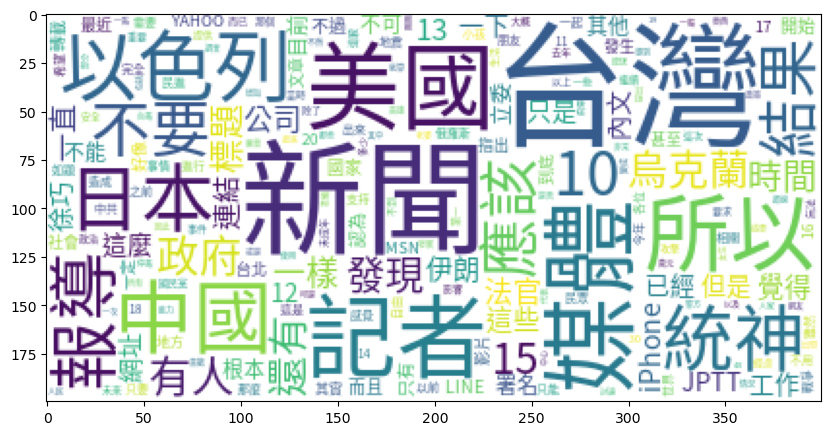

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(Wcloud)
plt.show()